# Predicting Christmas Shopping Trends
### Dataset Description
This dataset contains transaction data for Christmas shopping trends. The goal is to analyze and predict shopping patterns, customer behavior, and overall sales trends.

#### Key Columns:
1. **`TransactionID`**: Unique identifier for each transaction.
2. **`Date`**: Date of the transaction.
3. **`Time`**: Time of the transaction.
4. **`CustomerID`**: Unique identifier for each customer.
5. **`Age`**: Age of the customer.
6. **`Gender`**: Gender of the customer.
7. **`Location`**: Location where the purchase was made.
8. **`StoreID`**: Unique identifier for the store.
9. **`OnlineOrderFlag`**: Indicates whether the purchase was made online (1 = Online, 0 = In-store).
10. **`ProductID`**: Unique identifier for the product.
11. **`ProductName`**: Name of the purchased product.
12. **`Category`**: Product category (e.g., electronics, toys, etc.).
13. **`Quantity`**: Number of units purchased.
14. **`UnitPrice`**: Price per unit of the product.
15. **`TotalPrice`**: Total amount for the transaction (primary metric for sales analysis).
16. **`PaymentType`**: Payment method used (e.g., credit card, cash, etc.).
17. **`PromotionApplied`**: Indicates if a promotion was applied.
18. **`DiscountAmount`**: Discount amount applied to the transaction.
19. **`GiftWrap`**: Indicates if the product was gift-wrapped.
20. **`ShippingMethod`**: Method of shipping.
21. **`DeliveryTime`**: Time taken for delivery.
22. **`Weather`**: Weather conditions during the purchase.
23. **`Event`**: Event associated with the purchase (e.g., holiday sales).
24. **`CustomerSatisfaction`**: Customer's satisfaction rating.
25. **`ReturnFlag`**: Indicates if the item was returned.

**Dataset Source:**  
[Christmas Sales and Trends Dataset on Kaggle](https://www.kaggle.com/datasets/ibikunlegabriel/christmas-sales-and-trends)

---

# Step 1: Load and Inspect the Dataset


In [1]:
# Import necessary libraries
import pandas as pd

# Define the dataset path
data_path = "E:\Vedant\Jingle Byte Christmas Coding Competition 2024\Christmas Sales Prediction\data\Christmas Sales and Trends.csv"  

# Load the dataset
df = pd.read_csv(data_path)

# Display dataset information
print("Dataset Information:")
df.info()

# Display summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15 

# Step 2: Visualize Data Distribution
## Distribution of Total Price (Sales Amount)

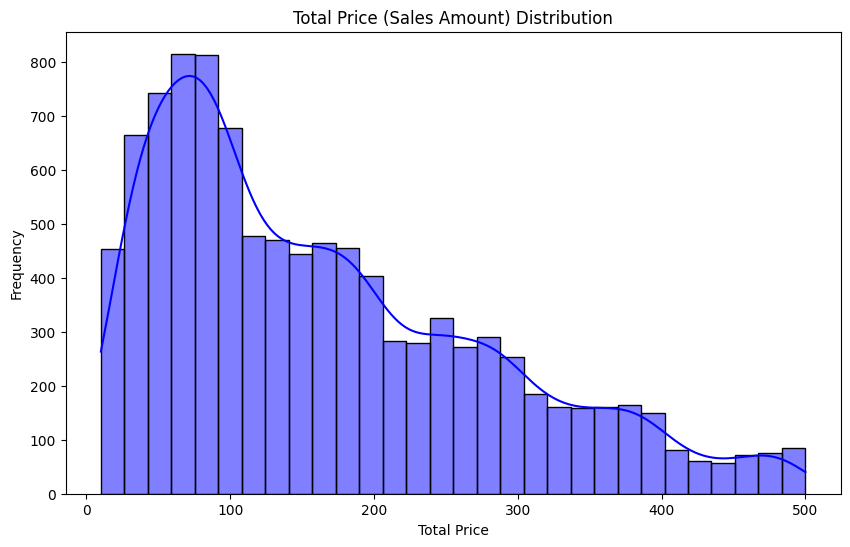

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total Price
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], kde=True, bins=30, color='blue')
plt.title("Total Price (Sales Amount) Distribution")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()

## Top 10 Product Categories by Total Price

C:\Users\Saurav Tripathi\AppData\Local\Temp\ipykernel_20660\940885115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


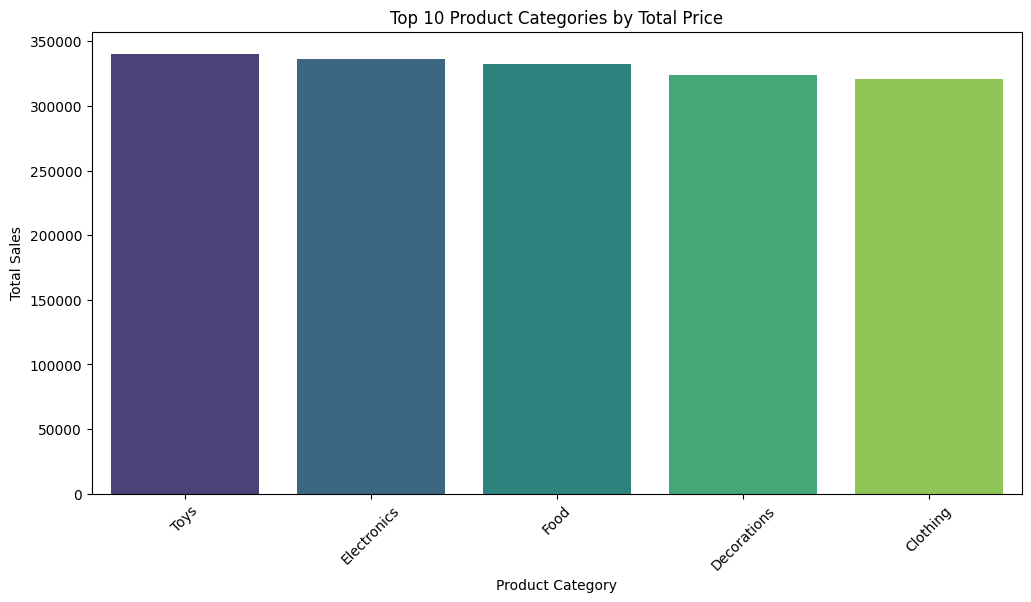

In [3]:
# Top 10 Product Categories
top_categories = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Visualize top categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 10 Product Categories by Total Price")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Step 3: Time Series Analysis
## Daily Sales Trends

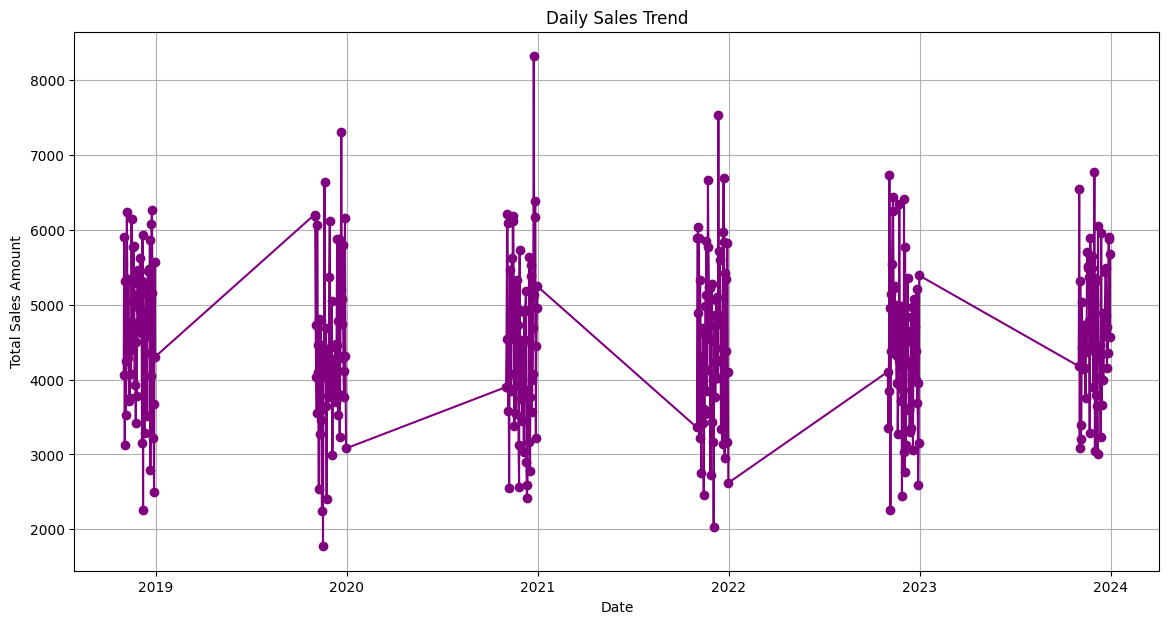

In [4]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales by date
daily_sales = df.groupby('Date')['TotalPrice'].sum()

# Plot daily sales trend
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='purple')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

# Step 4: Identify Patterns
## Sales by Day of the Week

C:\Users\Saurav Tripathi\AppData\Local\Temp\ipykernel_20660\1384241153.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")


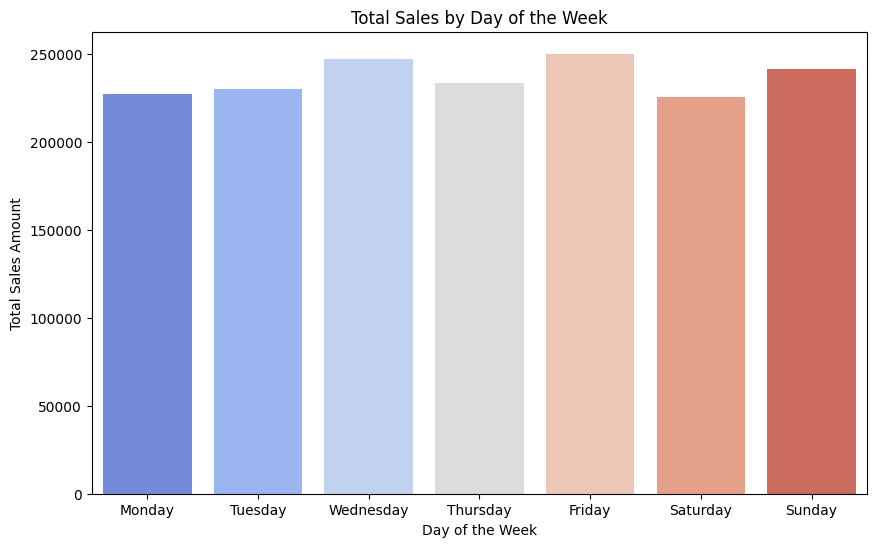

In [5]:
# Add a new feature for the day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()

# Aggregate sales by day of the week
weekday_sales = df.groupby('Day_of_Week')['TotalPrice'].sum()

# Sort days for better visualization
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales Amount")
plt.show()

# Step 5: Data Preprocessing
## Handle Missing Values and Select Features


In [6]:
# Fill missing values for numerical and categorical columns
df['CustomerSatisfaction'] = df['CustomerSatisfaction'].fillna(df['CustomerSatisfaction'].mean())
df['DiscountAmount'] = df['DiscountAmount'].fillna(0)
df.fillna("Unknown", inplace=True)

# Verify missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Select features
features = [
    'Age', 'Gender', 'Category', 'Quantity', 'UnitPrice', 
    'DiscountAmount', 'CustomerSatisfaction', 'OnlineOrderFlag', 
    'PromotionApplied', 'GiftWrap', 'ShippingMethod', 'Weather'
]
target = 'TotalPrice'

# Split features (X) and target (y)
X = df[features]
y = df[target]


Missing Values After Handling:
TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
ProductName             0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
Day_of_Week             0
dtype: int64


C:\Users\Saurav Tripathi\AppData\Local\Temp\ipykernel_20660\1465262811.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


# Step 6: Preprocessing Pipeline
## Set up transformers for numerical and categorical data

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['Age', 'Quantity', 'UnitPrice', 'DiscountAmount', 'CustomerSatisfaction']
categorical_features = ['Gender', 'Category', 'OnlineOrderFlag', 'PromotionApplied', 'GiftWrap', 'ShippingMethod', 'Weather']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 7: Train-Test Split
## Split the data into training and testing sets

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify split
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (8000, 12)
Testing data size: (2000, 12)


# Step 8: Train a Linear Regression Model

In [9]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


# Step 9: Evaluate the Model
## Evaluate the performance of the model on test data


In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 27.24
Mean Squared Error (MSE): 1313.99
R² Score: 0.91


# Step 10: Residual Analysis
## Visualize residuals to check for patterns


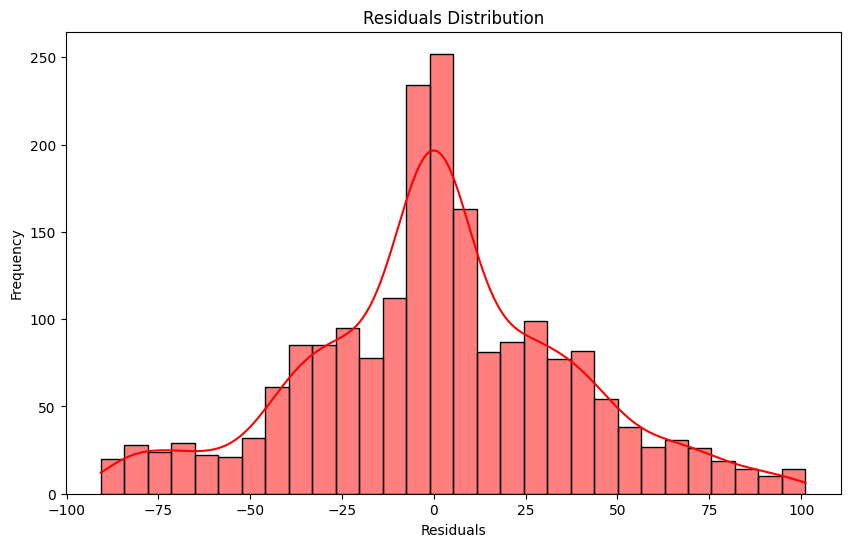

In [11]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Step 11: Make Predictions
## Predict TotalPrice on the test dataset and explore potential trends.


In [12]:
# Predict on test data
y_test_pred = model.predict(X_test)

# Compare actual vs predicted for a sample
comparison_df = pd.DataFrame({
    'Actual': y_test[:10],
    'Predicted': y_test_pred[:10]
})
print("Actual vs Predicted Sample:")
print(comparison_df)

Actual vs Predicted Sample:
          Actual  Predicted
6252  166.135413  173.84375
4684  383.134101  331.34375
1731  265.418079  274.93750
4742  486.026139  391.25000
4521  101.440341  105.78125
6340  202.074604  206.25000
576    25.293063  -29.31250
5202  432.221067  361.84375
6363  166.194556  173.93750
439   111.212291  114.34375


## Visualize Actual vs Predicted TotalPrice

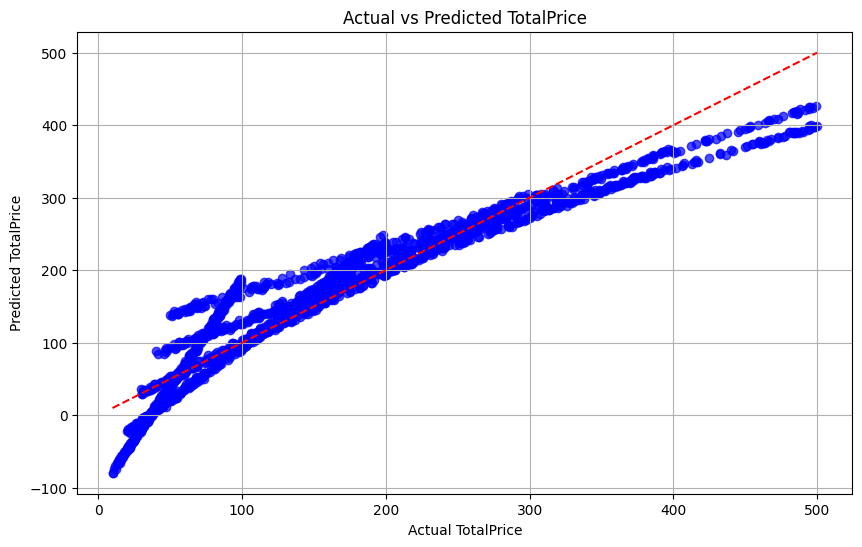

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted TotalPrice")
plt.xlabel("Actual TotalPrice")
plt.ylabel("Predicted TotalPrice")
plt.grid()
plt.show()

# Step 12: Predict for New Hypothetical Data
## Use the trained model to forecast TotalPrice for unseen data.


In [14]:
# Example new data
new_data = pd.DataFrame({
    'Age': [25, 40],
    'Gender': ['Male', 'Female'],
    'Category': ['Electronics', 'Toys'],
    'Quantity': [2, 5],
    'UnitPrice': [500, 150],
    'DiscountAmount': [50, 20],
    'CustomerSatisfaction': [4.5, 3.8],
    'OnlineOrderFlag': [1, 0],
    'PromotionApplied': [1, 0],
    'GiftWrap': [1, 1],
    'ShippingMethod': ['Express', 'Standard'],
    'Weather': ['Sunny', 'Rainy']
})

# Preprocess and predict
new_data_pred = model.predict(new_data)
new_data['Predicted_TotalPrice'] = new_data_pred
print("Predictions for New Data:")
print(new_data)

Predictions for New Data:
   Age  Gender     Category  Quantity  UnitPrice  DiscountAmount  \
0   25    Male  Electronics         2        500              50   
1   40  Female         Toys         5        150              20   

   CustomerSatisfaction  OnlineOrderFlag  PromotionApplied  GiftWrap  \
0                   4.5                1                 1         1   
1                   3.8                0                 0         1   

  ShippingMethod Weather  Predicted_TotalPrice  
0        Express   Sunny          1.425344e+03  
1       Standard   Rainy          1.101467e+13  


In [15]:
import pickle

# Save the trained model to a file
model_save_path = "E:\Vedant\Jingle Byte Christmas Coding Competition 2024\Christmas Sales Prediction\models\sales_model.pkl"  
with open(model_save_path, "wb") as model_file:
    pickle.dump(model, model_file)

print(f"Model saved successfully at {model_save_path}")

Model saved successfully at E:\Vedant\Jingle Byte Christmas Coding Competition 2024\Christmas Sales Prediction\models\sales_model.pkl


In [16]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the absolute path to the 'results' folder
results_folder = r"E:\Vedant\Jingle Byte Christmas Coding Competition 2024\Christmas Sales Prediction\results"

# Create 'results' directory if it doesn't exist
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

# Function to save the plot
def save_plot(filename):
    plt.savefig(os.path.join(results_folder, filename))
    plt.close()

# Distribution of Total Price
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], kde=True, bins=30, color='blue')
plt.title("Total Price (Sales Amount) Distribution")
plt.xlabel("Total Price")
plt.ylabel("Frequency")
save_plot("total_price_distribution.png")

# Top 10 Product Categories
top_categories = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 10 Product Categories by Total Price")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
save_plot("top_categories.png")

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales by date
daily_sales = df.groupby('Date')['TotalPrice'].sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='purple')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
save_plot("daily_sales_trend.png")

# Add a new feature for the day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()

# Aggregate sales by day of the week
weekday_sales = df.groupby('Day_of_Week')['TotalPrice'].sum()
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales Amount")
save_plot("sales_by_day_of_week.png")

# Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
save_plot("residuals_distribution.png")

# Actual vs Predicted TotalPrice
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted TotalPrice")
plt.xlabel("Actual TotalPrice")
plt.ylabel("Predicted TotalPrice")
plt.grid()
save_plot("actual_vs_predicted.png")


C:\Users\Saurav Tripathi\AppData\Local\Temp\ipykernel_20660\212806653.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
C:\Users\Saurav Tripathi\AppData\Local\Temp\ipykernel_20660\212806653.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
